# Mosquito & Land Cover Stats
Basic statistics (mean, median, max counts) and charting larvae numbers. Do counts vary by reported species or location?

To run the code right here in this tab, click the rocket ship icon ({fa}`rocket`) and choose {fa}`caret-right` **Live Code**.

```{admonition} Alternatively, use Google Colab
:class: dropdown
You can run the following code using Google Colab, which runs on your browser (no installations required). Click the rocket ship icon ({fa}`rocket`) and choose Colab.

An additional step is needed for Google Colab to load the data. Click on the Folder icon to the very left. Then, click the Upload icon and choose where you downloaded the dataaset from the previous lesson (1.5: Intro to GLOBE Data). You can also drag and drop your downloaded data. You will get a warning saying "Warning: Ensure that your files are saved elsewhere." This is because all data uploaded to Google Colab will be deleted once you close the browser. Since you have the files on your computer, you can click "OK." It will take a few seconds for the data to finish uploading.
```

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

## Mosquito

Let's load the data. If you get a `DataSourceError`, it may be because the data has not finished uploading. Wait a few seconds (see the bottom left corner of your screen to know when the data has finished uploading) and then run the cell again.

In [4]:
mosquito = gpd.read_file('../data/globe_mosquito.zip').to_crs(epsg=3087)
mosquito.head()

,CountryCode,CountryName,Elevation,AbdomenCloseupPhotoUrls,BreedingGroundEliminated,Comments,DataSource,ExtraData,Genus,GlobeTeams,LarvaFullBodyPhotoUrls,LarvaeCount,LastIdentifyStage,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MosquitoAdults,MosquitoEggs,MosquitoHabitatMapperId,MosquitoPupae,Species,Userid,WaterSource,WaterSourcePhotoUrls,WaterSourceType,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,LarvaeCountProcessed,geometry
0,BRA,Brazil,6.3,None,false,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,13,automatic,2024-12-31 17:16:00,0,-2.5617,-44.2657,None,None,46287,false,None,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,2024-12-31,0.0,POINT (5264912.237 -2024609.923)
1,BRA,Brazil,6.3,None,false,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,13,automatic,2024-12-31 17:20:00,0,-2.5617,-44.2657,None,None,46290,false,None,137422629,ovitrap,https://data.globe.gov/system/photos/2024/12/3...,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,371514,23MNT816168,2024-12-31,0.0,POINT (5264912.237 -2024609.923)
2,BRA,Brazil,7.4,None,true,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,51,automatic,2024-12-31 22:32:00,0,-2.5163,-44.3023,None,None,46482,false,None,137420190,"cement, metal or plastic tank",None,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,372864,23MNT775218,2024-12-31,0.0,POINT (5259139.009 -2021830.953)
3,BRA,Brazil,20.6,None,true,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,66,automatic,2024-12-31 00:05:00,0,-2.8639,-44.0549,None,None,46203,false,None,137419937,can or bottle,None,container: artificial,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,2024-12-31,0.0,POINT (5299282.41 -2044503.727)
4,BRA,Brazil,20.6,None,true,None,GLOBE Observer App,LarvaeVisibleNo,None,[COLUNSLZ],None,0,None,28,automatic,2024-12-31 00:23:00,0,-2.8639,-44.0550,None,None,46223,false,None,137419937,lake,None,still: lake/pond/swamp,17459532,Brazil Citizen Science,mosquito_habitat_mapper,373085,23MPS050834,2024-12-31,0.0,POINT (5299282.41 -2044503.727)


See the list of columns:

In [5]:
mosquito.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43342 entries, 0 to 43341
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CountryCode               43256 non-null  object        
 1   CountryName               43256 non-null  object        
 2   Elevation                 43342 non-null  object        
 3   AbdomenCloseupPhotoUrls   886 non-null    object        
 4   BreedingGroundEliminated  43281 non-null  object        
 5   Comments                  4039 non-null   object        
 6   DataSource                43342 non-null  object        
 7   ExtraData                 12518 non-null  object        
 8   Genus                     4402 non-null   object        
 9   GlobeTeams                16353 non-null  object        
 10  LarvaFullBodyPhotoUrls    8697 non-null   object        
 11  LarvaeCount               24895 non-null  object        
 12  LastIdenti

How many rows are in the dataset?

In [ ]:
len(mosquito)

43342

There were 43,342 citizen science contributions from 2018 to 2024. Now, let's see the number of countries where people submitted data.

In [ ]:
len(mosquito['CountryCode'].unique())

95

Let's see the types of the habitats (water sources) the citizen scientists recorded.

In [ ]:
# Broader water source types
mosquito['WaterSourceType'].value_counts()

,count
WaterSourceType,
container: artificial,33384
still: lake/pond/swamp,6343
container: natural,2224
flowing: still water found next to river or stream,1391


These are the general types of water sources that citizen scientists reported to NASA. It looks like most data were collected about artificial containers. Let's see some of the more specific types in the other column:

In [ ]:
# More specific water source types
mosquito['WaterSource'].value_counts()

,count
WaterSource,
"cement, metal or plastic tank",7583
dish or pot,4131
well or cistern,2814
jar,2412
fountain or bird bath,2362
ovitrap,2248
adult mosquito trap,2078
pond,2041
other,1935


Let's make a pie chart using the broader column, WaterSourceType

In [ ]:
# Here are some options for color palettes
display(sns.color_palette(palette='Set2'))
display(sns.color_palette(palette='twilight_shifted'))
display(sns.color_palette(palette='tab20'))

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

[(0.36002681809096376, 0.20694122817889948, 0.6029284543191687),
 (0.4113541469730457, 0.5368485776500593, 0.7466971285506578),
 (0.7387377170049494, 0.7959766573503101, 0.8214292278043301),
 (0.8398783988412087, 0.7603990719977968, 0.7136714781112923),
 (0.7387914002459927, 0.4205367299231533, 0.34913260148542435),
 (0.4981443546207415, 0.13569380302451714, 0.314135190862664)]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

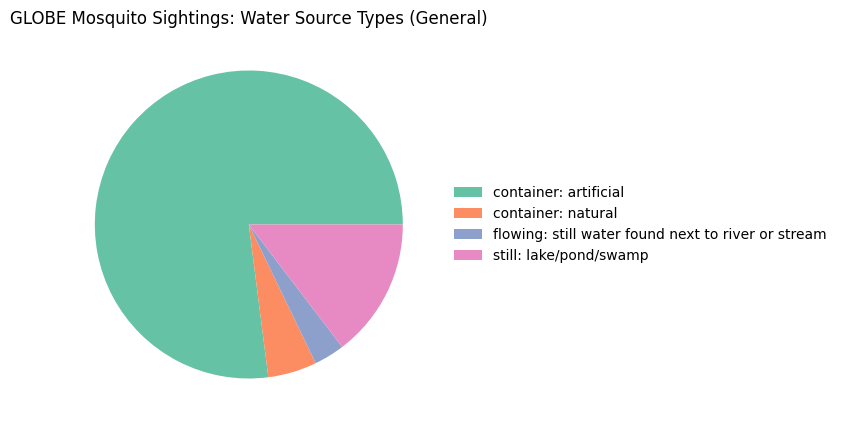

In [ ]:
# Pie chart of water types
types = mosquito[['SiteId', 'WaterSourceType']].groupby('WaterSourceType', as_index=False).count()

plt.figure(figsize=(5, 5))
patches, texts = plt.pie(x = types['SiteId'],
                         colors = sns.color_palette('Set2'))  # Enter your chosen color palette here
plt.title("GLOBE Mosquito Sightings: Water Source Types (General)")
plt.legend(patches, types['WaterSourceType'],
           loc = 'center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

In [ ]:
# What is the median larvae count by country?
mosquito_avg = mosquito.groupby('CountryCode')['LarvaeCountProcessed'].mean()
mosquito_avg

,LarvaeCountProcessed
CountryCode,
ARE,5.000000
ARG,116.108108
AUS,2.500000
BEL,NaN
BEN,38.191228
...,...
UKR,NaN
URY,0.043478
USA,660.753527


Let's make a map
Data from the World Food Programme, downloaded from Opendatasoft: https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/

In [ ]:
countries = gpd.read_file('https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/geojson')
mosquito_avg = countries.merge(mosquito_avg, left_on='iso3', right_on='CountryCode', how='left')

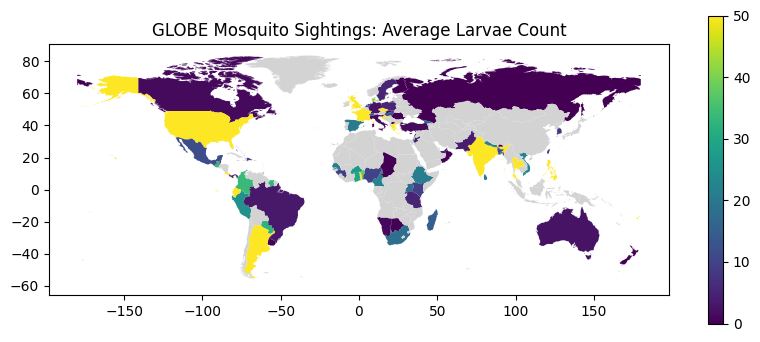

In [ ]:
fig, ax = plt.subplots(figsize = (10, 4))

mosquito_avg.plot(column = 'LarvaeCountProcessed', cmap = 'viridis',
                     legend = True, vmin = 0, vmax = 50, ax = ax,
                     missing_kwds = {'color': 'lightgrey'})
plt.title('GLOBE Mosquito Sightings: Average Larvae Count')
plt.show()

## Land Cover

In [6]:
land_cover = gpd.read_file('../data/globe_land_cover.zip').to_crs(epsg=3087)
land_cover.head()

,CountryCode,CountryName,Elevation,DataSource,DownwardCaption,DownwardExtraData,DownwardPhotoUrl,DryGround,EastCaption,EastClassifications,EastExtraData,EastPhotoUrl,Feature1Caption,Feature1ExtraData,Feature1PhotoUrl,Feature2Caption,Feature2ExtraData,Feature2PhotoUrl,Feature3Caption,Feature3ExtraData,Feature3PhotoUrl,Feature4Caption,Feature4ExtraData,Feature4PhotoUrl,FieldNotes,GlobeTeams,LandCoverId,LeavesOnTrees,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MucCode,MucDescription,MucDetails,Muddy,NorthCaption,NorthClassifications,NorthExtraData,NorthPhotoUrl,RainingSnowing,SnowIce,SouthCaption,SouthClassifications,SouthExtraData,SouthPhotoUrl,StandingWater,UpwardCaption,UpwardExtraData,UpwardPhotoUrl,Userid,WestCaption,WestClassifications,WestExtraData,WestPhotoUrl,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,geometry
0,ITA,Italy,489.2,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,true,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,"Snag C. sativa, 40 cm, cl 2, #01 #04 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,"Log 70 cm, C. sativa, cl 2, #04 #01 #12","((compassData.heading: 182, compassData.horizo...",https://data.globe.gov/system/photos/2024/12/3...,Stump of C. sativa 230 cm,"((compassData.heading: null, compassData.horiz...",https://data.globe.gov/system/photos/2024/12/3...,None,None,None,Old Coppice of Castanea sativa,[Conservazione Natura Universita Tuscia],78608,false,8,automatic,2024-12-31 15:07:00.000,492.4,42.1818,12.1825,None,None,,false,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,128342138,None,None,None,https://data.globe.gov/system/photos/2024/12/3...,17453129,Italy Citizen Science,land_covers,376869,33TTG673738,2024-12-31,POINT (7816199.236 5050397.003)
1,MDG,Madagascar,1350.1,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,true,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,Arbres plantés par l'équipe GLOBE avec la comm...,"[Africa 2024 Regional Meeting, Coordinating Of...",77695,true,10,automatic,2024-12-31 11:29:00.000,1340.6,-18.7576,47.5615,M01,"Trees, Closely Spaced, Evergreen - Needle Leaved",n,false,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,2538037,None,"90% MUC 01 (n) [Trees, Closely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373647,38KQE700240,2024-12-31,POINT (15162593.641 4407269.282)
2,MDG,Madagascar,1324.7,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,true,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Africa 2024 Regional Meeting, Coordinating Of...",77691,true,10,automatic,2024-12-31 12:07:00.000,1324.8,-18.7944,47.5799,M93,"Urban, Roads and Parking",,false,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,2538037,None,"60% MUC 93 [Urban, Roads and Parking]",None,https://data.globe.gov/system/photos/2024/12/3...,6508873,Madagascar GLOBE v-School,land_covers,373642,38KQE719199,202

In [ ]:
land_cover.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52020 entries, 0 to 52019
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CountryCode           49613 non-null  object        
 1   CountryName           49613 non-null  object        
 2   Elevation             52020 non-null  object        
 3   DataSource            52020 non-null  object        
 4   DownwardCaption       22648 non-null  object        
 5   DownwardExtraData     22644 non-null  object        
 6   DownwardPhotoUrl      40037 non-null  object        
 7   DryGround             43955 non-null  object        
 8   EastCaption           23889 non-null  object        
 9   EastClassifications   14465 non-null  object        
 10  EastExtraData         23884 non-null  object        
 11  EastPhotoUrl          42893 non-null  object        
 12  Feature1Caption       341 non-null    object        
 13  Feature1

In [ ]:
len(land_cover)

52020

There are slightly more observations submitted for GLOBE Land Cover than Mosquito Habitat Mapper, 52,020 observations.

In [ ]:
len(land_cover['CountryCode'].unique())

98

A helpful part of the land cover dataset is the MUC classifications. MUC, Modified UNESCO Classification, is a classification system with different land use types.

In [ ]:
# Let's see the different MUC codes
len(land_cover['MucCode'].unique())

155

In [ ]:
# What are the most common MUC codes by country?
land_cover_muc = land_cover.dropna(subset=['MucCode'])

muc = land_cover_muc.groupby('CountryCode')['MucDescription'] \
    .apply(lambda x: x.value_counts().idxmax()).reset_index(name='MucDescription')
muc['Count'] = land_cover_muc.groupby('CountryCode')['MucDescription'] \
    .apply(lambda x: x.value_counts().max()).values

muc

,CountryCode,MucDescription,Count
0,ARE,"Urban, Residential",3
1,ARG,"Cultivated Land, Non-Agriculture, Parks and At...",136
2,AUS,"Herbaceous/Grassland, Short Grass",8
3,AUT,"Barren, Dirt/Other",1
4,BEL,"Herbaceous/Grassland, Short Grass",2
...,...,...,...
78,UKR,"Urban, Other",8
79,URY,Herbaceous Vegetation,8
80,USA,"Herbaceous/Grassland, Short Grass",2801
81,VNM,"Urban, Commercial Property",6


In [ ]:
# We can check that this is correct by checking one of the countries:
land_cover[(land_cover['CountryCode'] == 'USA') &
 (land_cover['MucDescription'] == 'Herbaceous/Grassland, Short Grass')]

,CountryCode,CountryName,Elevation,DataSource,DownwardCaption,DownwardExtraData,DownwardPhotoUrl,DryGround,EastCaption,EastClassifications,EastExtraData,EastPhotoUrl,Feature1Caption,Feature1ExtraData,Feature1PhotoUrl,Feature2Caption,Feature2ExtraData,Feature2PhotoUrl,Feature3Caption,Feature3ExtraData,Feature3PhotoUrl,Feature4Caption,Feature4ExtraData,Feature4PhotoUrl,FieldNotes,GlobeTeams,LandCoverId,LeavesOnTrees,LocationAccuracyM,LocationMethod,MeasuredAt,MeasurementElevation,MeasurementLatitude,MeasurementLongitude,MucCode,MucDescription,MucDetails,Muddy,NorthCaption,NorthClassifications,NorthExtraData,NorthPhotoUrl,RainingSnowing,SnowIce,SouthCaption,SouthClassifications,SouthExtraData,SouthPhotoUrl,StandingWater,UpwardCaption,UpwardExtraData,UpwardPhotoUrl,Userid,WestCaption,WestClassifications,WestExtraData,WestPhotoUrl,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,geometry
10,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,77690,false,8,automatic,2024-12-31 17:57:00,234.6,39.1858,-86.7784,M43,"Herbaceous/Grassland, Short Grass",,false,None,"80% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",None,https://data.globe.gov/system/photos/2024/12/3...,true,false,None,"30% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,24905746,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,17043304,United States of America Citizen Science,land_covers,52378,16SEJ191374,2024-12-31,POINT (155085.192 1680910.803)
22,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/3...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,77679,false,6,automatic,2024-12-30 18:36:00,233.2,39.1859,-86.7783,M43,"Herbaceous/Grassland, Short Grass",,false,None,"80% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",None,https://data.globe.gov/system/photos/2024/12/3...,false,false,None,"30% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,false,None,None,https://data.globe.gov/system/photos/2024/12/3...,24905746,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/3...,17043304,United States of America Citizen Science,land_covers,52378,16SEJ191374,2024-12-30,POINT (155085.192 1680910.803)
38,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/2...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,77668,false,21,automatic,2024-12-29 17:49:00,233.3,39.1859,-86.7784,M43,"Herbaceous/Grassland, Short Grass",,false,None,"80% MUC 02 (b) [Trees, Closely Spaced, Deciduo...",None,https://data.globe.gov/system/photos/2024/12/2...,false,false,None,"30% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,false,None,None,https://data.globe.gov/system/photos/2024/12/2...,24905746,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,17043304,United States of America Citizen Science,land_covers,52378,16SEJ191374,2024-12-29,POINT (155085.192 1680910.803)
42,USA,United States,235.5,GLOBE Observer App,None,None,https://data.globe.gov/system/photos/2024/12/2...,false,None,"10% MUC 11 (n) [Trees, Loosely Spaced, Evergre...",None,https://data.globe.gov/system/photos/2024/12/2...,

In [ ]:
muc = countries.merge(muc, left_on='iso3', right_on='CountryCode', how='left')

In [ ]:
# There are general categories that each fall into
muc_list = ['Barren', 'Closed Forest', 'Cultivated', 'Herbaceous', 'Open Water', 'Trees', 'Urban', 'Wetlands', 'Woodland']

for muc_code in muc_list:
    muc.loc[muc['MucDescription'].str.contains(muc_code, na=False), 'MucDescriptionShort'] = muc_code

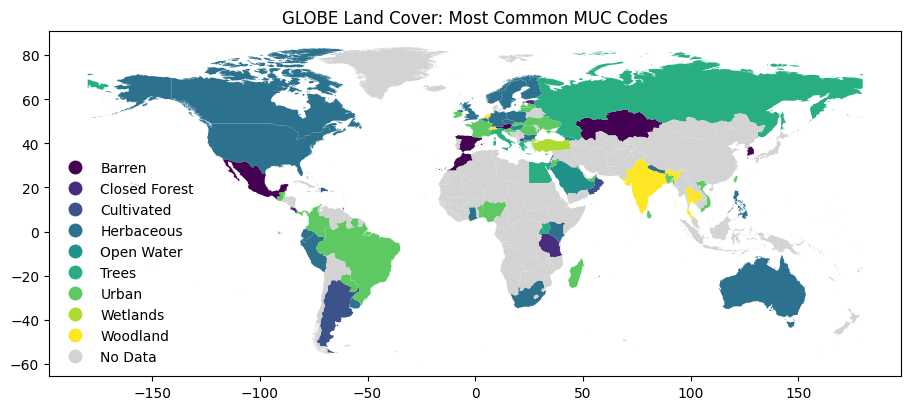

In [ ]:
fig, ax = plt.subplots(figsize = (11, 5))

muc.plot(column = 'MucDescriptionShort', cmap = 'viridis',
                     legend = True, ax = ax,
                     missing_kwds = {'color': 'lightgrey', 'label': 'No Data'},
                     legend_kwds={'loc': 'lower left', 'frameon': False})
plt.title('GLOBE Land Cover: Most Common MUC Codes')
plt.show()

## Combining Both

Now, we want to merge the mosquito and land cover datasets, and save the results as a new file.

In [ ]:
# Add a month and year for easier filtering
mosquito['month'] = mosquito['MeasuredAt'].dt.to_period('M')
mosquito['year'] = mosquito['MeasuredAt'].dt.year

land_cover['month'] = land_cover['MeasuredAt'].dt.to_period('M')
land_cover['year'] = land_cover['MeasuredAt'].dt.year

# Make a buffer around each mosquito point of 100 meters
mosquito['buffer_100m'] = mosquito.geometry.buffer(100)

In [ ]:
candidate_matches = gpd.sjoin(land_cover, mosquito.set_geometry('buffer_100m'), predicate='within')

In [ ]:
# Filter by same month
candidate_matches = candidate_matches[
    candidate_matches['month_left'] == candidate_matches['month_right']
]

# Calculate spatial and temporal distances
candidate_matches['spatial_distance'] = candidate_matches.apply(
    lambda row: row.geometry.distance(mosquito.loc[row['index_right'], 'geometry']),
    axis=1
)

candidate_matches['temporal_distance'] = (
    candidate_matches['MeasuredAt_left'] - candidate_matches['MeasuredAt_right']
).abs()

In [ ]:
# Rank by spatial + temporal proximity
candidate_matches['combined_score'] = candidate_matches['spatial_distance'] + candidate_matches['temporal_distance'].dt.days

# Keep only best match per mosquito point
best_matches = candidate_matches.sort_values('combined_score').drop_duplicates('index_right')

In [ ]:
# List of the land cover columns that we want
land_cover_cols = ['DryGround', 'LeavesOnTrees', 'Muddy', 'MucCode', 'MucDescription', 'RainingSnowing', 'SnowIce', 'StandingWater', 'MeasuredAt_left']

land_cover_renamed = best_matches.set_index('index_right')[land_cover_cols] \
                                 .rename(columns={'MeasuredAt_left': 'LandcoverMeasuredAt'})
land_cover_renamed['LandcoverMerged'] = True

final_merged = mosquito.drop(columns=['month', 'year', 'buffer_100m']).join(land_cover_renamed, how='left')

In [ ]:
# How many of the mosquito observations were able to be merged with land cover data based on the parameters (same month & within 100m)?
num_merged = len(final_merged[final_merged['LandcoverMerged'] == True])
print(f'{num_merged} observations merged ({round(num_merged * 100 / len(mosquito), 2)}%)')

3153 observations merged (7.27%)


In [ ]:
# final_merged.to_file('../data/globe_mosquito_land_cover_merge_100m_month.gpkg', driver='GPKG')